# Predicting galaxy redshift from band magnitudes with XGBoost

Zooey Nguyen

2021-07-01

2021-07-06: Updated with photoz_utils

2021-07-08: Updated with density estimation

mostly same code as `HSC Photo-Z Data and Simple Model Exploration.ipynb`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from photoz_utils import *

## Import photoz data + filter out bad objects

In [2]:
df = import_photoz_data()
df = clean_photoz_data(df)

               g_mag          r_mag          i_mag          z_mag  \
count  120087.000000  120087.000000  120087.000000  120087.000000   
mean       23.125958      22.295162      21.658525      21.314297   
std         1.315028       1.270731       1.267032       1.276612   
min        16.207699      15.334381      14.787071      14.448893   
25%        22.442802      21.681322      21.074194      20.715300   
50%        23.227943      22.461906      21.819270      21.457150   
75%        23.969581      23.080850      22.353845      22.002482   
max        25.999767      26.860947      27.057146      27.920784   

               y_mag          zspec  
count  120087.000000  120087.000000  
mean       21.135538       0.836557  
std         1.294271       0.530408  
min        14.223459       0.010250  
25%        20.510621       0.546725  
50%        21.279144       0.742620  
75%        21.844333       0.975000  
max        34.435986       3.996137  


## Make train and test sets on filtered data

In [3]:
X_train, X_test, y_train, y_test = split_photoz_data(df)
X_train

,g_mag,r_mag,i_mag,z_mag,y_mag
21734,24.504389,22.873390,21.844864,21.413353,21.251614
29829,23.006490,22.741142,22.189460,21.908180,21.763527
87672,22.739940,22.307323,21.780006,21.423714,21.269934
44126,23.050856,22.100529,21.317432,20.760340,20.503252
15362,24.016571,22.388695,21.549751,21.138458,20.990040
...,...,...,...,...,...
1876,25.273735,23.505634,21.904675,20.868376,20.338629
50955,23.031580,22.412374,21.626053,21.240420,21.074623
30800,23.020475,22.185158,21.603676,21.323395,21.295616
105741,20.211823,19.800993,19.434418,19.038305,18.748224


## Train simple XGBoost regression

In [11]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluate training point estimates

R squared: 0.229614526401542
Mean squared error: 0.2165688363698849
Bias: 0.048461295358628635
Conventional dispersion: 0.12338631058284104


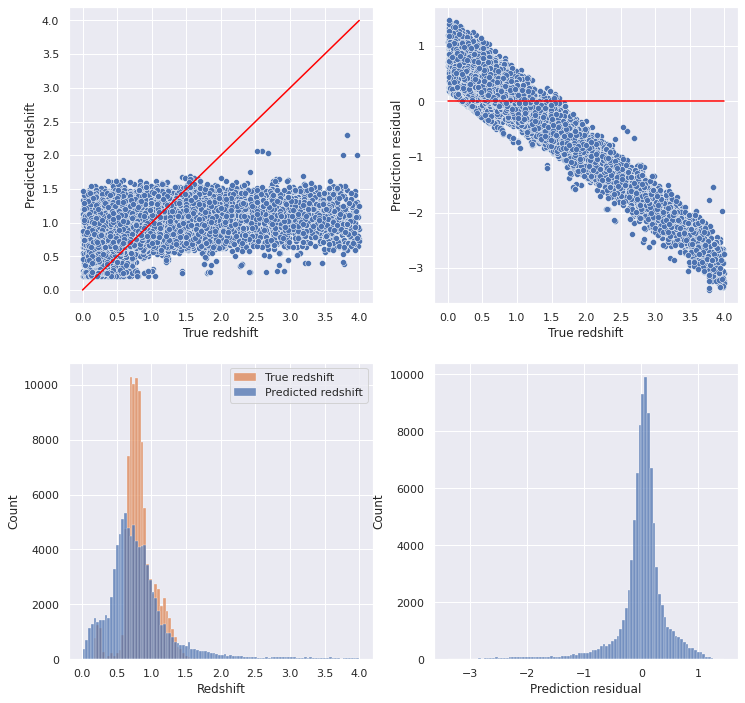

In [10]:
y_train_pred = xgb_model.predict(X_train)
evaluate_point_estimates(y_train, y_train_pred)

In [6]:
evaluate_point_outliers(y_train, y_train_pred)

Outlier rate: 0.2410871352881783
Loss function: 21734     0.558482
29829     0.736502
87672     0.568439
44126     0.745540
15362     0.432267
            ...   
1876      0.519704
50955     0.767991
30800     0.503092
105741    0.003121
77477     0.509241
Name: zspec, Length: 96069, dtype: float64


## Evaluate test point estimates

R squared: 0.3186025419740054
Mean squared error: 0.19227401527947022
Bias: 0.045262428844988004
Conventional dispersion: 0.09320189360848073


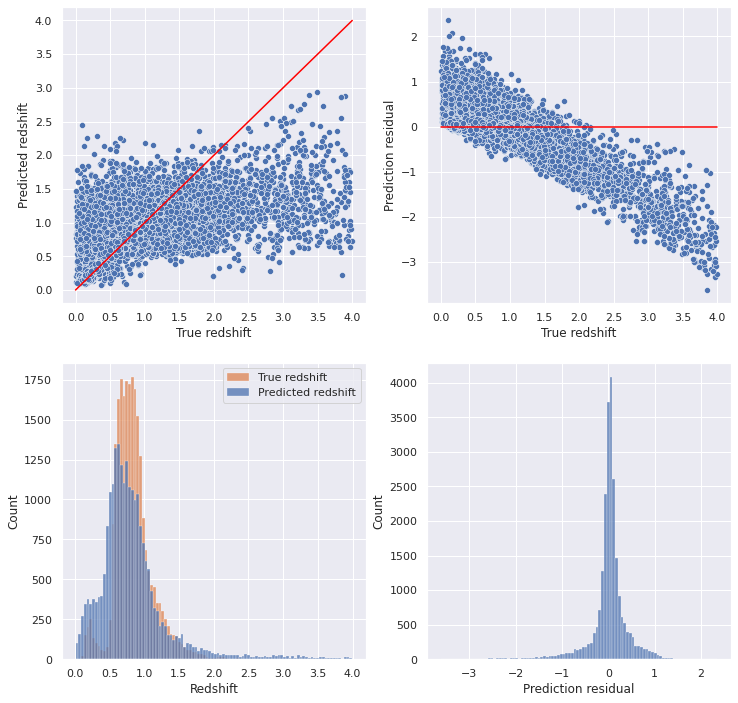

In [7]:
y_test_pred = xgb_model.predict(X_test)
evaluate_point_estimates(y_test, y_test_pred)

In [8]:
evaluate_point_outliers(y_test, y_test_pred)

Outlier rate: 0.26555083687234576
Loss function: 56001     0.391318
61852     0.704145
78062     0.541388
85974     0.126041
51980     0.544564
            ...   
96576     0.391002
88434     0.661502
50558     0.695652
110494    0.375523
113941    0.008407
Name: zspec, Length: 24018, dtype: float64
